In [1]:
import numpy as np
import matplotlib.pyplot as plt
pi=np.pi

#### Fitzhugh-Nagumo model
$$
\begin{align}
\dot{v} = \ c(-\frac{v^3}{3}+v-w+I) \\
\dot{w} = \ \frac{v-bv+a}{\tau} \\
I = 0.38 \\
\end{align}
$$

In [2]:
def FNmodel(vec, I):
    def dvdt(vec, I):
        return c*(-vec[0]**3/3+vec[0]-vec[1]+I)

    def dwdt(vec):
        return (vec[0]-b*vec[1]+a)/tau

    def dvecdt(vec, I):
        return np.array([dvdt(vec, I), dwdt(vec)])
        
    k1=dvecdt(vec, I)
    k2=dvecdt(vec+dt*k1/2, I)
    k3=dvecdt(vec+dt*k2/2, I)
    k4=dvecdt(vec+dt*k3, I)
    return vec+(k1+2*k2+2*k3+k4)*dt/6

T=10

### Effect of a

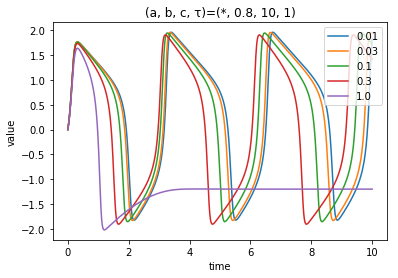

In [3]:
As=[0.01, 0.03, 0.1, 0.3, 1.0]
b=0.8
c=10
tau=1

dt=0.001
I=0.38

for a in As:
    t=0
    vec=np.zeros([2, 1]).reshape(2, 1)
    while t<T:
        vec=np.c_[vec, FNmodel(vec[:, -1], I).reshape(2, 1)]
        t+=dt
        
    plt.plot(np.arange(vec.shape[1])*dt, vec[0], label=str(a))
    
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('value')
plt.title('(a, b, c, τ)=(*, 0.8, 10, 1)')
plt.show()

### Effect of b

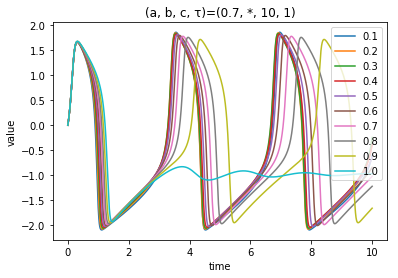

In [4]:
a=0.7
Bs=[(i+1)/10 for i in range(10)]
c=10
tau=1

I=0.38

for b in Bs:
    t=0
    vec=np.zeros([2, 1]).reshape(2, 1)
    while t<T:
        vec=np.c_[vec, FNmodel(vec[:, -1], I).reshape(2, 1)]
        t+=dt
        
    plt.plot(np.arange(vec.shape[1])*dt, vec[0], label=str(b))

    
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('value')
plt.title('(a, b, c, τ)=(0.7, *, 10, 1)')
plt.show()

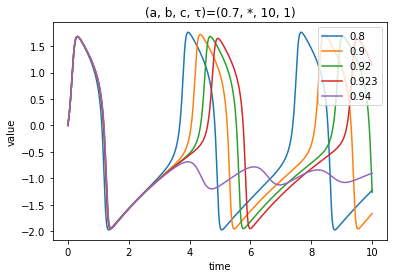

In [5]:
a=0.7
Bs=[0.8, 0.9, 0.92, 0.923, 0.94]
c=10
tau=1

I=0.38

for b in Bs:
    t=0
    vec=np.zeros([2, 1]).reshape(2, 1)
    while t<T:
        vec=np.c_[vec, FNmodel(vec[:, -1], I).reshape(2, 1)]
        t+=dt
        
    plt.plot(np.arange(vec.shape[1])*dt, vec[0], label=str(b))

    
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('value')
plt.title('(a, b, c, τ)=(0.7, *, 10, 1)')
plt.show()

### Effect of c

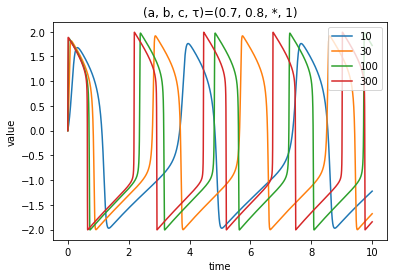

In [6]:
a=0.7
b=0.8
Cs=[10, 30, 100, 300]
tau=1

I=0.38

for c in Cs:
    t=0
    vec=np.zeros([2, 1]).reshape(2, 1)
    while t<T:
        vec=np.c_[vec, FNmodel(vec[:, -1], I).reshape(2, 1)]
        t+=dt
        
    plt.plot(np.arange(vec.shape[1])*dt, vec[0], label=str(c))

    
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('value')
plt.title('(a, b, c, τ)=(0.7, 0.8, *, 1)')
plt.show()

##### Effect of c with large b

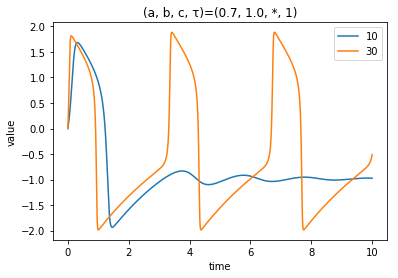

In [7]:
a=0.7
b=1
Cs=[10, 30]
tau=1

I=0.38

for c in Cs:
    t=0
    vec=np.zeros([2, 1]).reshape(2, 1)
    while t<T:
        vec=np.c_[vec, FNmodel(vec[:, -1], I).reshape(2, 1)]
        t+=dt
        
    plt.plot(np.arange(vec.shape[1])*dt, vec[0], label=str(c))

    
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('value')
plt.title('(a, b, c, τ)=(0.7, 1.0, *, 1)')
plt.show()

### Effect of τ

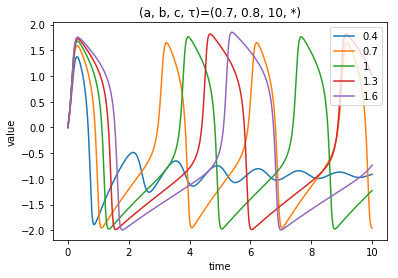

In [8]:
a=0.7
b=0.8
c=10
Ts=[0.4, 0.7, 1, 1.3, 1.6]

I=0.38

for tau in Ts:
    t=0
    vec=np.zeros([2, 1]).reshape(2, 1)
    while t<T:
        vec=np.c_[vec, FNmodel(vec[:, -1], I).reshape(2, 1)]
        t+=dt
        
    plt.plot(np.arange(vec.shape[1])*dt, vec[0], label=str(tau))

    
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('value')
plt.title('(a, b, c, τ)=(0.7, 0.8, 10, *)')
plt.show()

#### Effect of b with small τ

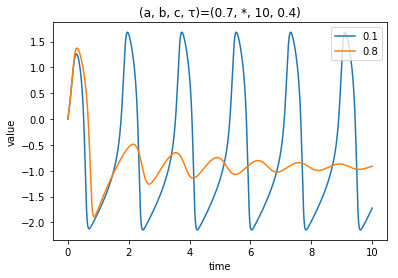

In [9]:
a=0.7
Bs=[0.1, 0.8]
c=10
tau=0.4

I=0.38

for b in Bs:
    t=0
    vec=np.zeros([2, 1]).reshape(2, 1)
    while t<T:
        vec=np.c_[vec, FNmodel(vec[:, -1], I).reshape(2, 1)]
        t+=dt
        
    plt.plot(np.arange(vec.shape[1])*dt, vec[0], label=str(b))

plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('value')
plt.title('(a, b, c, τ)=(0.7, *, 10, 0.4)')
plt.show()

#### Effect of c with small τ

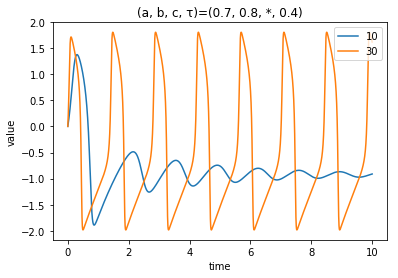

In [10]:
a=0.7
b=0.8
Cs=[10, 30]
tau=0.4

I=0.38

for c in Cs:
    t=0
    vec=np.zeros([2, 1]).reshape(2, 1)
    while t<T:
        vec=np.c_[vec, FNmodel(vec[:, -1], I).reshape(2, 1)]
        t+=dt
        
    plt.plot(np.arange(vec.shape[1])*dt, vec[0], label=str(c))

    
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('value')
plt.title('(a, b, c, τ)=(0.7, 0.8, *, 0.4)')
plt.show()